# Correlation between MRT usage and air pollution in Seoul
## Does air pollution affect MRT usage?

Air pollution in Korea has become a disaster in a few years. As part of an emergency plan announced last year by Seoul Mayor Park Won-soon, the city will make public transit free during rush hours on days when the air quality index reaches above 50 and is expected to stay there for at least a day. Free rides will be provided on the second day as well. To pay for the measure, Park set aside 24.9 billion won (about $23 million) in December 2017, declaring the worsening air as a disaster in order to tap into the city’s disaster management fund. “The value of human beings is far greater than that of money,” he said last year. So we demonstrated the corellation between MRT usage and air pollution in Seoul to verify if the policy is effective.

Data source: http://data.seoul.go.kr/

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import csv   

# To draw graph in notebook
%matplotlib inline

# To create grid in graph 
plt.style.use('ggplot')

# To deal with font error
#mpl.rcParams['axes.unicode_minus'] = False

In raw data, data of 201701 & 201702 is missing. So we decided to replace those date to 201801 & 201802. Hence, comparing the first two months in each year is not allowed. 

In [4]:
# Import data ( 201701 & 201702 data is replaced with 201801 & 201802 to deal with missing data)

subway201701 = pd.read_csv('subway_201701.csv', encoding='EUC-KR')
subway201702 = pd.read_csv('subway_201702.csv', encoding='EUC-KR')
subway201703 = pd.read_csv('subway_201703.csv', encoding='EUC-KR')
subway201704 = pd.read_csv('subway_201704.csv', encoding='EUC-KR')
subway201705 = pd.read_csv('subway_201705.csv', encoding='EUC-KR')
subway201706 = pd.read_csv('subway_201706.csv', encoding='EUC-KR')
subway201707 = pd.read_csv('subway_201707.csv', encoding='EUC-KR')
subway201708 = pd.read_csv('subway_201708.csv', encoding='EUC-KR')
subway201709 = pd.read_csv('subway_201709.csv', encoding='EUC-KR')
subway201710 = pd.read_csv('subway_201710.csv', encoding='EUC-KR')
subway201711 = pd.read_csv('subway_201711.csv', encoding='EUC-KR')
subway201712 = pd.read_csv('subway_201712.csv', encoding='EUC-KR')
subway201801 = pd.read_csv('subway_201801.csv', encoding='EUC-KR')
subway201802 = pd.read_csv('subway_201802.csv', encoding='EUC-KR')
subway201803 = pd.read_csv('subway_201803.csv', encoding='EUC-KR')
subway201804 = pd.read_csv('subway_201804.csv', encoding='EUC-KR')
subway201805 = pd.read_csv('subway_201805.csv', encoding='EUC-KR')
subway201806 = pd.read_csv('subway_201806.csv', encoding='EUC-KR')
subway201807 = pd.read_csv('subway_201807.csv', encoding='EUC-KR')
subway201808 = pd.read_csv('subway_201808.csv', encoding='EUC-KR')
subway201809 = pd.read_csv('subway_201809.csv', encoding='EUC-KR')
subway201810 = pd.read_csv('subway_201810.csv', encoding='EUC-KR')
subway201811 = pd.read_csv('subway_201811.csv', encoding='EUC-KR')
subway201812 = pd.read_csv('subway_201812.csv', encoding='EUC-KR')



In [5]:
#Data merge and correct data type

frames = [subway201701,subway201702,subway201703,subway201704,subway201705,subway201706,subway201707,subway201708,subway201709,subway201710,subway201711,subway201712,subway201801,subway201802,subway201803,subway201804,subway201805,subway201806,subway201807,subway201808,subway201809,subway201810,subway201811,subway201812]

total_subway = pd.concat(frames)
total_subway.columns = ['Date','Line','Station_ID','Station_Name','Entries_N','Exits_N','Update_Date']

#total_subway['Entries_N'] = total_subway['Entries_N'].astype(int)
#total_subway['Update_Date'] = total_subway['Update_Date'].astype(object)
total_subway['Date'] = pd.to_datetime(total_subway['Date'], format ='%Y%m%d')


total_subway.dtypes

Date            datetime64[ns]
Line                    object
Station_ID               int64
Station_Name            object
Entries_N                int64
Exits_N                  int64
Update_Date              int64
dtype: object

In [6]:
total_subway.columns
total_subway.head()
total_subway.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421353 entries, 0 to 17728
Data columns (total 7 columns):
Date            421353 non-null datetime64[ns]
Line            421353 non-null object
Station_ID      421353 non-null int64
Station_Name    421353 non-null object
Entries_N       421353 non-null int64
Exits_N         421353 non-null int64
Update_Date     421353 non-null int64
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 25.7+ MB


In [7]:
#check null
total_subway.isnull().sum()

Date            0
Line            0
Station_ID      0
Station_Name    0
Entries_N       0
Exits_N         0
Update_Date     0
dtype: int64

In [8]:
null_columns=total_subway.columns[total_subway.isnull().any()]

In [9]:
print(total_subway[total_subway["Date"].isnull()][null_columns])

Empty DataFrame
Columns: []
Index: []


In [10]:
total_subway["year"] = total_subway["Date"].dt.year
total_subway["month"] = total_subway["Date"].dt.month
total_subway["day"] = total_subway["Date"].dt.day

total_subway.head()

,Date,Line,Station_ID,Station_Name,Entries_N,Exits_N,Update_Date,year,month,day
0,2017-01-01,경의선,1271,능곡,1958,1864,20170104,2017,1,1
1,2017-01-01,경의선,1272,곡산,242,213,20170104,2017,1,1
2,2017-01-01,경의선,1273,백마,2665,2592,20170104,2017,1,1
3,2017-01-01,경의선,1274,풍산,2356,2314,20170104,2017,1,1
4,2017-01-01,경의선,1275,일산,4058,4000,20170104,2017,1,1


To see the correlation between MRT usage and airpollution, we imported air pollution data from seoul data centre. Basiccally, Seoul measures fine dust and ultrafine dust indices in several locations in Seoul.

In [11]:
# Import aitpollution data

fine_dust = pd.read_csv('fine_dust.csv', encoding='EUC-KR')
ultrafine_dust = pd.read_csv('ultrafine_dust.csv', encoding='EUC-KR')

fine_dust.columns = ['Date','fine_dust']
ultrafine_dust.columns = ['Date','ultrafine_dust']

ultrafine_dust.head()

,Date,ultrafine_dust
0,20170101,58
1,20170101,58
2,20170101,54
3,20170101,65
4,20170101,54


In [12]:
fine_dust['Date'] = pd.to_datetime(fine_dust['Date'], format ='%Y%m%d')
ultrafine_dust['Date'] = pd.to_datetime(ultrafine_dust['Date'], format ='%Y%m%d')

ultrafine_dust.dtypes

Date              datetime64[ns]
ultrafine_dust             int64
dtype: object

In [13]:
fine_dust = fine_dust.groupby(['Date'],as_index=False).mean()
ultrafine_dust = ultrafine_dust.groupby(['Date'],as_index=False).mean()

ultrafine_dust.head()



,Date,ultrafine_dust
0,2017-01-01,60.09375
1,2017-01-02,81.34375
2,2017-01-03,52.31250
3,2017-01-04,36.00000
4,2017-01-05,23.06250


In [14]:
# Add airpollution columns 
total_subway_dust = total_subway.join(fine_dust.set_index('Date'), on='Date')
total_subway_dust = total_subway_dust.join(ultrafine_dust.set_index('Date'), on='Date')
total_subway_dust.dtypes
total_subway_dust.head()

,Date,Line,Station_ID,Station_Name,Entries_N,Exits_N,Update_Date,year,month,day,fine_dust,ultrafine_dust
0,2017-01-01,경의선,1271,능곡,1958,1864,20170104,2017,1,1,80.410256,60.09375
1,2017-01-01,경의선,1272,곡산,242,213,20170104,2017,1,1,80.410256,60.09375
2,2017-01-01,경의선,1273,백마,2665,2592,20170104,2017,1,1,80.410256,60.09375
3,2017-01-01,경의선,1274,풍산,2356,2314,20170104,2017,1,1,80.410256,60.09375
4,2017-01-01,경의선,1275,일산,4058,4000,20170104,2017,1,1,80.410256,60.09375


Since we expected that weather affects MRT usage as much as air pollution, we added weather data to "tatal_subway" data set so we can check the correlations together.

In [15]:
# Import weather data

weather = pd.read_csv('weather.csv', encoding='EUC-KR')
weather.columns = ['Date','Temperature','Humidity','Wind','Precipitation']

weather.head()

,Date,Temperature,Humidity,Wind,Precipitation
0,20170101,3.2,76.300003,0.1,0.0
1,20170101,3.6,78.099998,0.5,0.0
2,20170101,3.7,78.199997,0.7,0.0
3,20170101,4.6,77.800003,1.2,0.0
4,20170101,4.4,68.500000,0.3,0.0


In [16]:
weather['Date'] = pd.to_datetime(weather['Date'], format ='%Y%m%d')

weather.dtypes

Date             datetime64[ns]
Temperature             float64
Humidity                float64
Wind                    float64
Precipitation           float64
dtype: object

In [17]:
weather = weather.groupby(['Date'],as_index=False).mean()

weather.head()


,Date,Temperature,Humidity,Wind,Precipitation
0,2017-01-01,3.900000,75.926923,0.769231,0.000000
1,2017-01-02,6.419231,76.288462,1.376923,0.057692
2,2017-01-03,3.569231,62.530770,1.257692,0.000000
3,2017-01-04,5.296154,59.869231,1.038462,0.000000
4,2017-01-05,5.050000,55.300000,1.773077,0.000000


In [18]:
# Add weather culumns 
total_subway_weather = total_subway_dust.join(weather.set_index('Date'), on='Date')
total_subway_weather.dtypes
total_subway_weather.head()

,Date,Line,Station_ID,Station_Name,Entries_N,Exits_N,Update_Date,year,month,day,fine_dust,ultrafine_dust,Temperature,Humidity,Wind,Precipitation
0,2017-01-01,경의선,1271,능곡,1958,1864,20170104,2017,1,1,80.410256,60.09375,3.9,75.926923,0.769231,0.0
1,2017-01-01,경의선,1272,곡산,242,213,20170104,2017,1,1,80.410256,60.09375,3.9,75.926923,0.769231,0.0
2,2017-01-01,경의선,1273,백마,2665,2592,20170104,2017,1,1,80.410256,60.09375,3.9,75.926923,0.769231,0.0
3,2017-01-01,경의선,1274,풍산,2356,2314,20170104,2017,1,1,80.410256,60.09375,3.9,75.926923,0.769231,0.0
4,2017-01-01,경의선,1275,일산,4058,4000,20170104,2017,1,1,80.410256,60.09375,3.9,75.926923,0.769231,0.0


In [19]:
# Classify by day of week

total_subway_weather["dayofweek"] = total_subway_weather["Date"].dt.dayofweek
total_subway_weather.head()

,Date,Line,Station_ID,Station_Name,Entries_N,Exits_N,Update_Date,year,month,day,fine_dust,ultrafine_dust,Temperature,Humidity,Wind,Precipitation,dayofweek
0,2017-01-01,경의선,1271,능곡,1958,1864,20170104,2017,1,1,80.410256,60.09375,3.9,75.926923,0.769231,0.0,6
1,2017-01-01,경의선,1272,곡산,242,213,20170104,2017,1,1,80.410256,60.09375,3.9,75.926923,0.769231,0.0,6
2,2017-01-01,경의선,1273,백마,2665,2592,20170104,2017,1,1,80.410256,60.09375,3.9,75.926923,0.769231,0.0,6
3,2017-01-01,경의선,1274,풍산,2356,2314,20170104,2017,1,1,80.410256,60.09375,3.9,75.926923,0.769231,0.0,6
4,2017-01-01,경의선,1275,일산,4058,4000,20170104,2017,1,1,80.410256,60.09375,3.9,75.926923,0.769231,0.0,6


When it comes to air pollution, since National Disaster Management System issues alert messages based on 4 grades of fine dust and ultrafine dust indices, we classified air pollution data according to its official criteria.

In [20]:
# Classify by air pollution 

def fine(row):
    if row['fine_dust'] <= 30 :
        val = 0
    elif row['fine_dust'] <= 80:
        val = 1
    elif row['fine_dust'] <= 150:
        val = 2
    else:
        val = 3
    return val

def ultrafine(row):
    if row['ultrafine_dust'] <= 15 :
        val = 0
    elif row['ultrafine_dust'] <= 35:
        val = 1
    elif row['ultrafine_dust'] <= 75:
        val = 2
    else:
        val = 3
    return val

In [21]:
total_subway_weather['fine_dust_level'] = total_subway_weather.apply(fine, axis=1)
total_subway_weather['ultrafine_dust_level'] = total_subway_weather.apply(ultrafine, axis=1)

total_subway_weather.head()

,Date,Line,Station_ID,Station_Name,Entries_N,Exits_N,Update_Date,year,month,day,fine_dust,ultrafine_dust,Temperature,Humidity,Wind,Precipitation,dayofweek,fine_dust_level,ultrafine_dust_level
0,2017-01-01,경의선,1271,능곡,1958,1864,20170104,2017,1,1,80.410256,60.09375,3.9,75.926923,0.769231,0.0,6,2,2
1,2017-01-01,경의선,1272,곡산,242,213,20170104,2017,1,1,80.410256,60.09375,3.9,75.926923,0.769231,0.0,6,2,2
2,2017-01-01,경의선,1273,백마,2665,2592,20170104,2017,1,1,80.410256,60.09375,3.9,75.926923,0.769231,0.0,6,2,2
3,2017-01-01,경의선,1274,풍산,2356,2314,20170104,2017,1,1,80.410256,60.09375,3.9,75.926923,0.769231,0.0,6,2,2
4,2017-01-01,경의선,1275,일산,4058,4000,20170104,2017,1,1,80.410256,60.09375,3.9,75.926923,0.769231,0.0,6,2,2


Now, let's look at the bar plots below.
According to gragh, we can check that the number of MRT usage is a bit lower during summer and winter vacation. However, we have to be aware that January and February of 2017 data is replaced with 2018 data due to missing data. By day of week, MRT usage is significantly low duing weekends.

C:\Users\choimh\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0.5,0,'dayofweek'), Text(0.5,1,'Entries per dayofweek')]

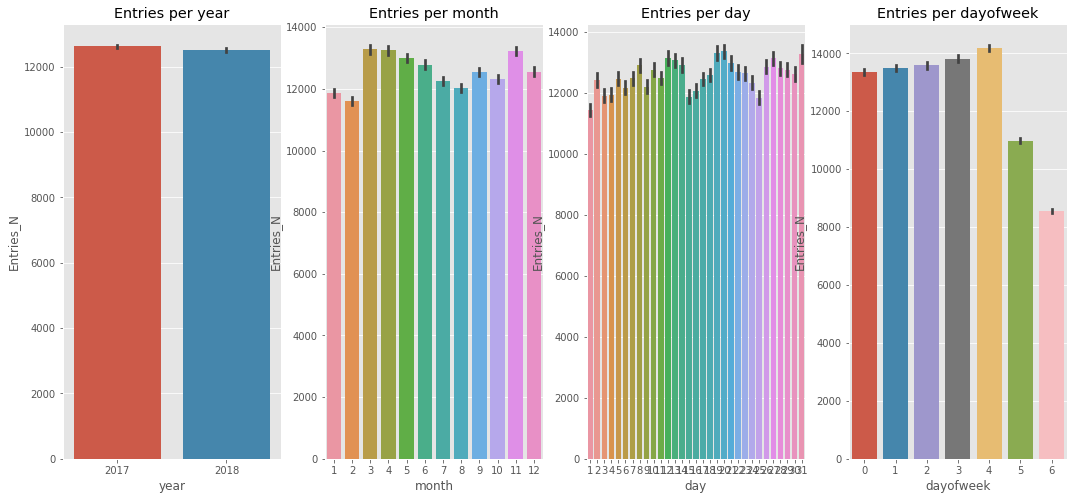

In [22]:
figure, ((ax1,ax2,ax3,ax4)) = plt.subplots(nrows=1, ncols=4)
figure.set_size_inches(18,8)

sns.barplot(data=total_subway_weather, x="year", y="Entries_N", ax=ax1)
sns.barplot(data=total_subway_weather, x="month", y="Entries_N", ax=ax2)
sns.barplot(data=total_subway_weather, x="day", y="Entries_N", ax=ax3)
sns.barplot(data=total_subway_weather, x="dayofweek", y="Entries_N", ax=ax4)


ax1.set(ylabel='Entries_N',title="Entries per year")
ax2.set(xlabel='month',title="Entries per month")
ax3.set(xlabel='day',title="Entries per day")
ax4.set(xlabel='dayofweek',title="Entries per dayofweek")

From box plots, we noticed that there are many outliers in our dataset. So we decide to remove the outliers to increase analysis accuaracy before checking correlation among each variable.

[Text(0,0.5,'Entries_N'),
 Text(0.5,0,'dayofweek'),
 Text(0.5,1,'Entries per dayofweek')]

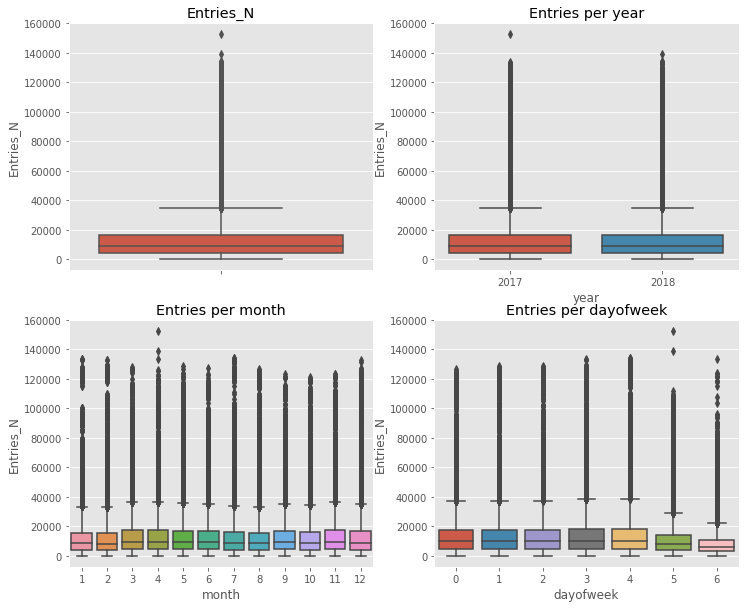

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12,10)
sns.boxplot(data=total_subway_weather,y="Entries_N",orient="v",ax=axes[0][0])
sns.boxplot(data=total_subway_weather,y="Entries_N",x="year",orient="v",ax=axes[0][1])
sns.boxplot(data=total_subway_weather,y="Entries_N",x="month",orient="v",ax=axes[1][0])
sns.boxplot(data=total_subway_weather,y="Entries_N",x="dayofweek",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Entries_N',title="Entries_N")
axes[0][1].set(xlabel='year',ylabel='Entries_N',title="Entries per year")
axes[1][0].set(xlabel='month',ylabel='Entries_N',title="Entries per month")
axes[1][1].set(xlabel='dayofweek',ylabel='Entries_N',title="Entries per dayofweek")


In [29]:
# Eliminate outliers

nooutliers = total_subway_weather[np.abs(total_subway_weather["Entries_N"]-total_subway_weather["Entries_N"].mean()) <= (3*total_subway_weather["Entries_N"].std())]

print(total_subway_weather.shape)
print(nooutliers.shape)
                                                                                                                        

(421353, 20)
(412656, 20)


In [34]:
nooutliers.head()

,Date,Line,Station_ID,Station_Name,Entries_N,Exits_N,Update_Date,year,month,day,fine_dust,ultrafine_dust,Temperature,Humidity,Wind,Precipitation,dayofweek,fine_dust_level,ultrafine_dust_level,year_month
0,2017-01-01,경의선,1271,능곡,1958,1864,20170104,2017,1,1,80.410256,60.09375,3.9,75.926923,0.769231,0.0,6,2,2,2017-1
1,2017-01-01,경의선,1272,곡산,242,213,20170104,2017,1,1,80.410256,60.09375,3.9,75.926923,0.769231,0.0,6,2,2,2017-1
2,2017-01-01,경의선,1273,백마,2665,2592,20170104,2017,1,1,80.410256,60.09375,3.9,75.926923,0.769231,0.0,6,2,2,2017-1
3,2017-01-01,경의선,1274,풍산,2356,2314,20170104,2017,1,1,80.410256,60.09375,3.9,75.926923,0.769231,0.0,6,2,2,2017-1
4,2017-01-01,경의선,1275,일산,4058,4000,20170104,2017,1,1,80.410256,60.09375,3.9,75.926923,0.769231,0.0,6,2,2,2017-1


[Text(0,0.5,'Entries_N'),
 Text(0.5,0,'dayofweek'),
 Text(0.5,1,'Entries per dayofweek')]

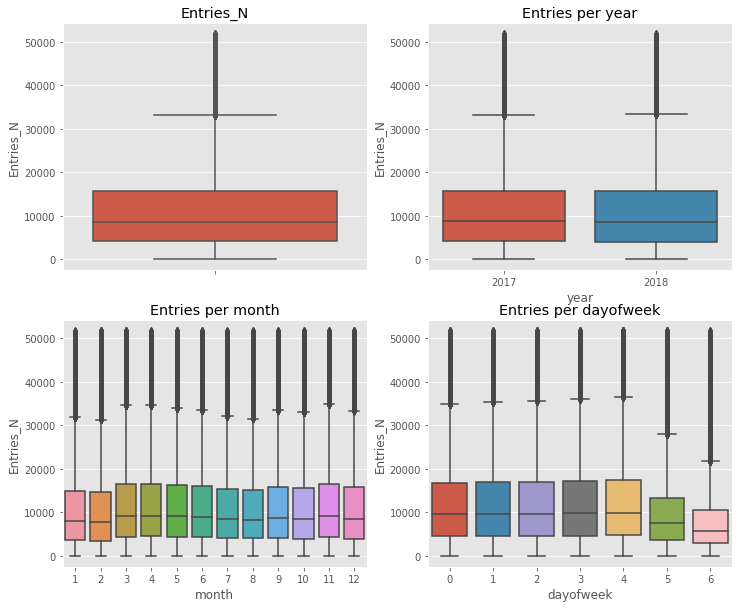

In [30]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12,10)
sns.boxplot(data=nooutliers,y="Entries_N",orient="v",ax=axes[0][0])
sns.boxplot(data=nooutliers,y="Entries_N",x="year",orient="v",ax=axes[0][1])
sns.boxplot(data=nooutliers,y="Entries_N",x="month",orient="v",ax=axes[1][0])
sns.boxplot(data=nooutliers,y="Entries_N",x="dayofweek",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Entries_N',title="Entries_N")
axes[0][1].set(xlabel='year',ylabel='Entries_N',title="Entries per year")
axes[1][0].set(xlabel='month',ylabel='Entries_N',title="Entries per month")
axes[1][1].set(xlabel='dayofweek',ylabel='Entries_N',title="Entries per dayofweek")

As the result of the correlation below, there is no significant mutual relation between MRT usage and candidate variable, which means air pollution and weather condition didn't significantly affect MRT usage in 2017 and 2018.

In [31]:
# Check correlation 

corrMatt = total_subway_weather[["fine_dust_level","ultrafine_dust_level","Temperature","Humidity","Wind","Precipitation","dayofweek","Entries_N"]]
corrMatt = corrMatt.corr()
print(corrMatt)

mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False

                      fine_dust_level  ultrafine_dust_level  Temperature  \
fine_dust_level              1.000000              0.847823    -0.109701   
ultrafine_dust_level         0.847823              1.000000    -0.079071   
Temperature                 -0.109701             -0.079071     1.000000   
Humidity                    -0.057215              0.114076     0.483062   
Wind                        -0.095229             -0.225935    -0.043497   
Precipitation               -0.171743             -0.122273     0.170437   
dayofweek                    0.000465              0.015576     0.002380   
Entries_N                    0.013317              0.009266     0.002236   

                      Humidity      Wind  Precipitation  dayofweek  Entries_N  
fine_dust_level      -0.057215 -0.095229      -0.171743   0.000465   0.013317  
ultrafine_dust_level  0.114076 -0.225935      -0.122273   0.015576   0.009266  
Temperature           0.483062 -0.043497       0.170437   0.002380   0.0022

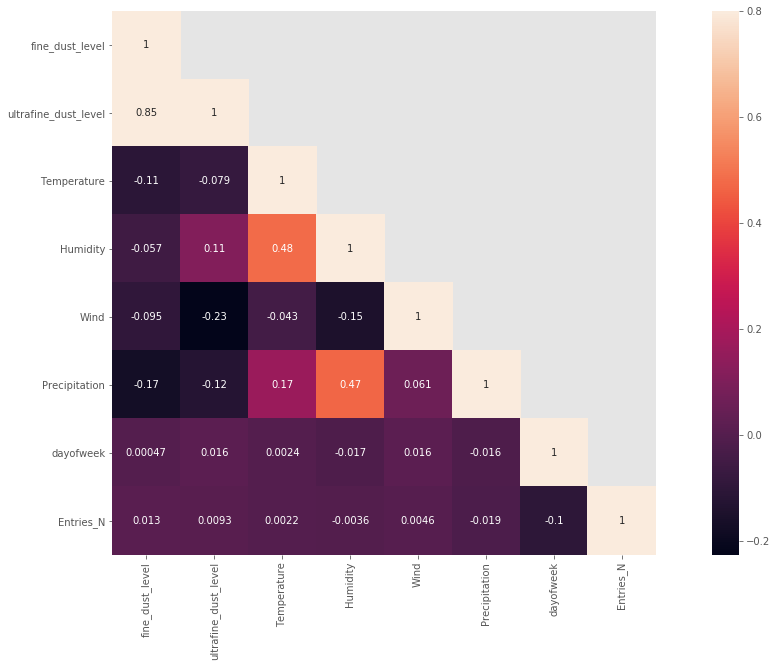

In [32]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

To demonstrate the results of correlation analysis, we visualized data with air pollution variables to check if there is patterns we couldn't catched. However, no graph shows significant patterns or difference by each airpollution group. Additionally, to lead statictical conclution, we decided to confirm Pearson's correlation coefficient.

C:\Users\choimh\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


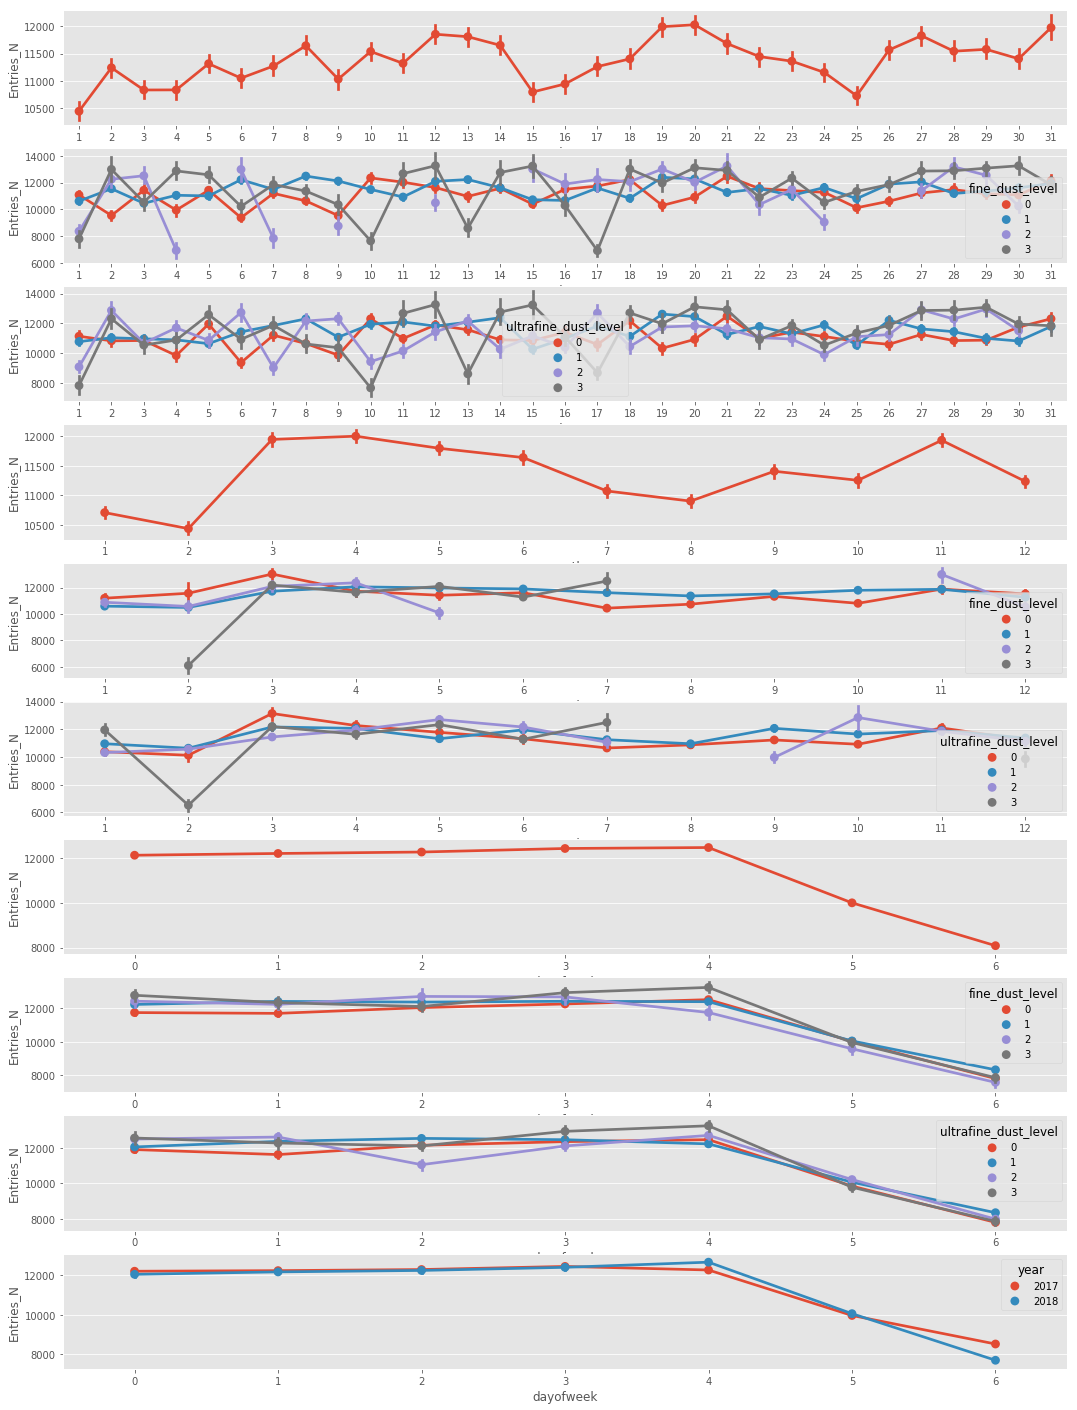

In [35]:
fig,(ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9, ax10)=plt.subplots(nrows=10)
fig.set_size_inches(18,25)

sns.pointplot(data=nooutliers, x="day", y="Entries_N", ax=ax1)

sns.pointplot(data=nooutliers, x="day", y="Entries_N", hue="fine_dust_level", ax=ax2)

sns.pointplot(data=nooutliers, x="day", y="Entries_N", hue="ultrafine_dust_level", ax=ax3)

sns.pointplot(data=nooutliers, x="month", y="Entries_N", ax=ax4)

sns.pointplot(data=nooutliers, x="month", y="Entries_N", hue="fine_dust_level", ax=ax5)

sns.pointplot(data=nooutliers, x="month", y="Entries_N", hue="ultrafine_dust_level", ax=ax6)

sns.pointplot(data=nooutliers, x="dayofweek", y="Entries_N", ax=ax7)

sns.pointplot(data=nooutliers, x="dayofweek", y="Entries_N", hue="fine_dust_level", ax=ax8)

sns.pointplot(data=nooutliers, x="dayofweek", y="Entries_N", hue="ultrafine_dust_level", ax=ax9)

sns.pointplot(data=nooutliers, x="dayofweek", y="Entries_N", hue="year", ax=ax10)

According to Pearson's correlation coefficient, it shows that the two varibles are not correlated with MRT usage (Pearson's r=0.015, P-value<0.001 and Pearson's r=0.009, P-value<0.001 apiece).

In [36]:
# Pearson's correlation coefficient

import scipy

scipy.stats.pearsonr(nooutliers["Entries_N"], nooutliers["fine_dust_level"])

(0.014750810755928946, 2.6381856181333656e-21)

In [37]:
import scipy

scipy.stats.pearsonr(nooutliers["Entries_N"], nooutliers["ultrafine_dust_level"])

(0.009249809138148685, 2.815141715743534e-09)

# Conclusion
## Does air pollution affect MRT usage?


In [43]:
As air pollution in Korea worsens on, we tried to argue if air pollution affects MRT usage.

SyntaxError: invalid syntax (<ipython-input-43-647ec4f9ab02>, line 1)